# Signal processing and analysis of human brain potentials (EEG) [Exercise 3]
## Cleaning Data
**T:** Download the `P3` dataset for Subject `30` (before 2020-11-20 12.53 this stated subject 9, sorry!) from the [ERPcore](https://osf.io/thsqg/).

In [1]:
##from mne_bids import (BIDSPath,read_raw_bids)
#import mne_bids
#import importlib
#import ccs_eeg_utils
from mne.io import read_raw_eeglab


raw = read_raw_eeglab('../local/30/30_P3.set')

#ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading ../local/30/30_P3.fdt
Reading 0 ... 393215  =      0.000 ...   383.999 secs...


<RawEEGLAB | 30_P3.fdt, 33 x 393216 (384.0 s), ~99.1 MB, data loaded>

**T:** Go through the dataset using the MNE explorer and clean it. You can use `raw.plot()` for this. If you are working from a jupyter notebook, try to use `%matplotlib qt` for better support of the cleaning window. To get an understanding how the tool works, press `help` or type `?` in the window. (Hint: You first have to add a new annotation by pressing `a`)

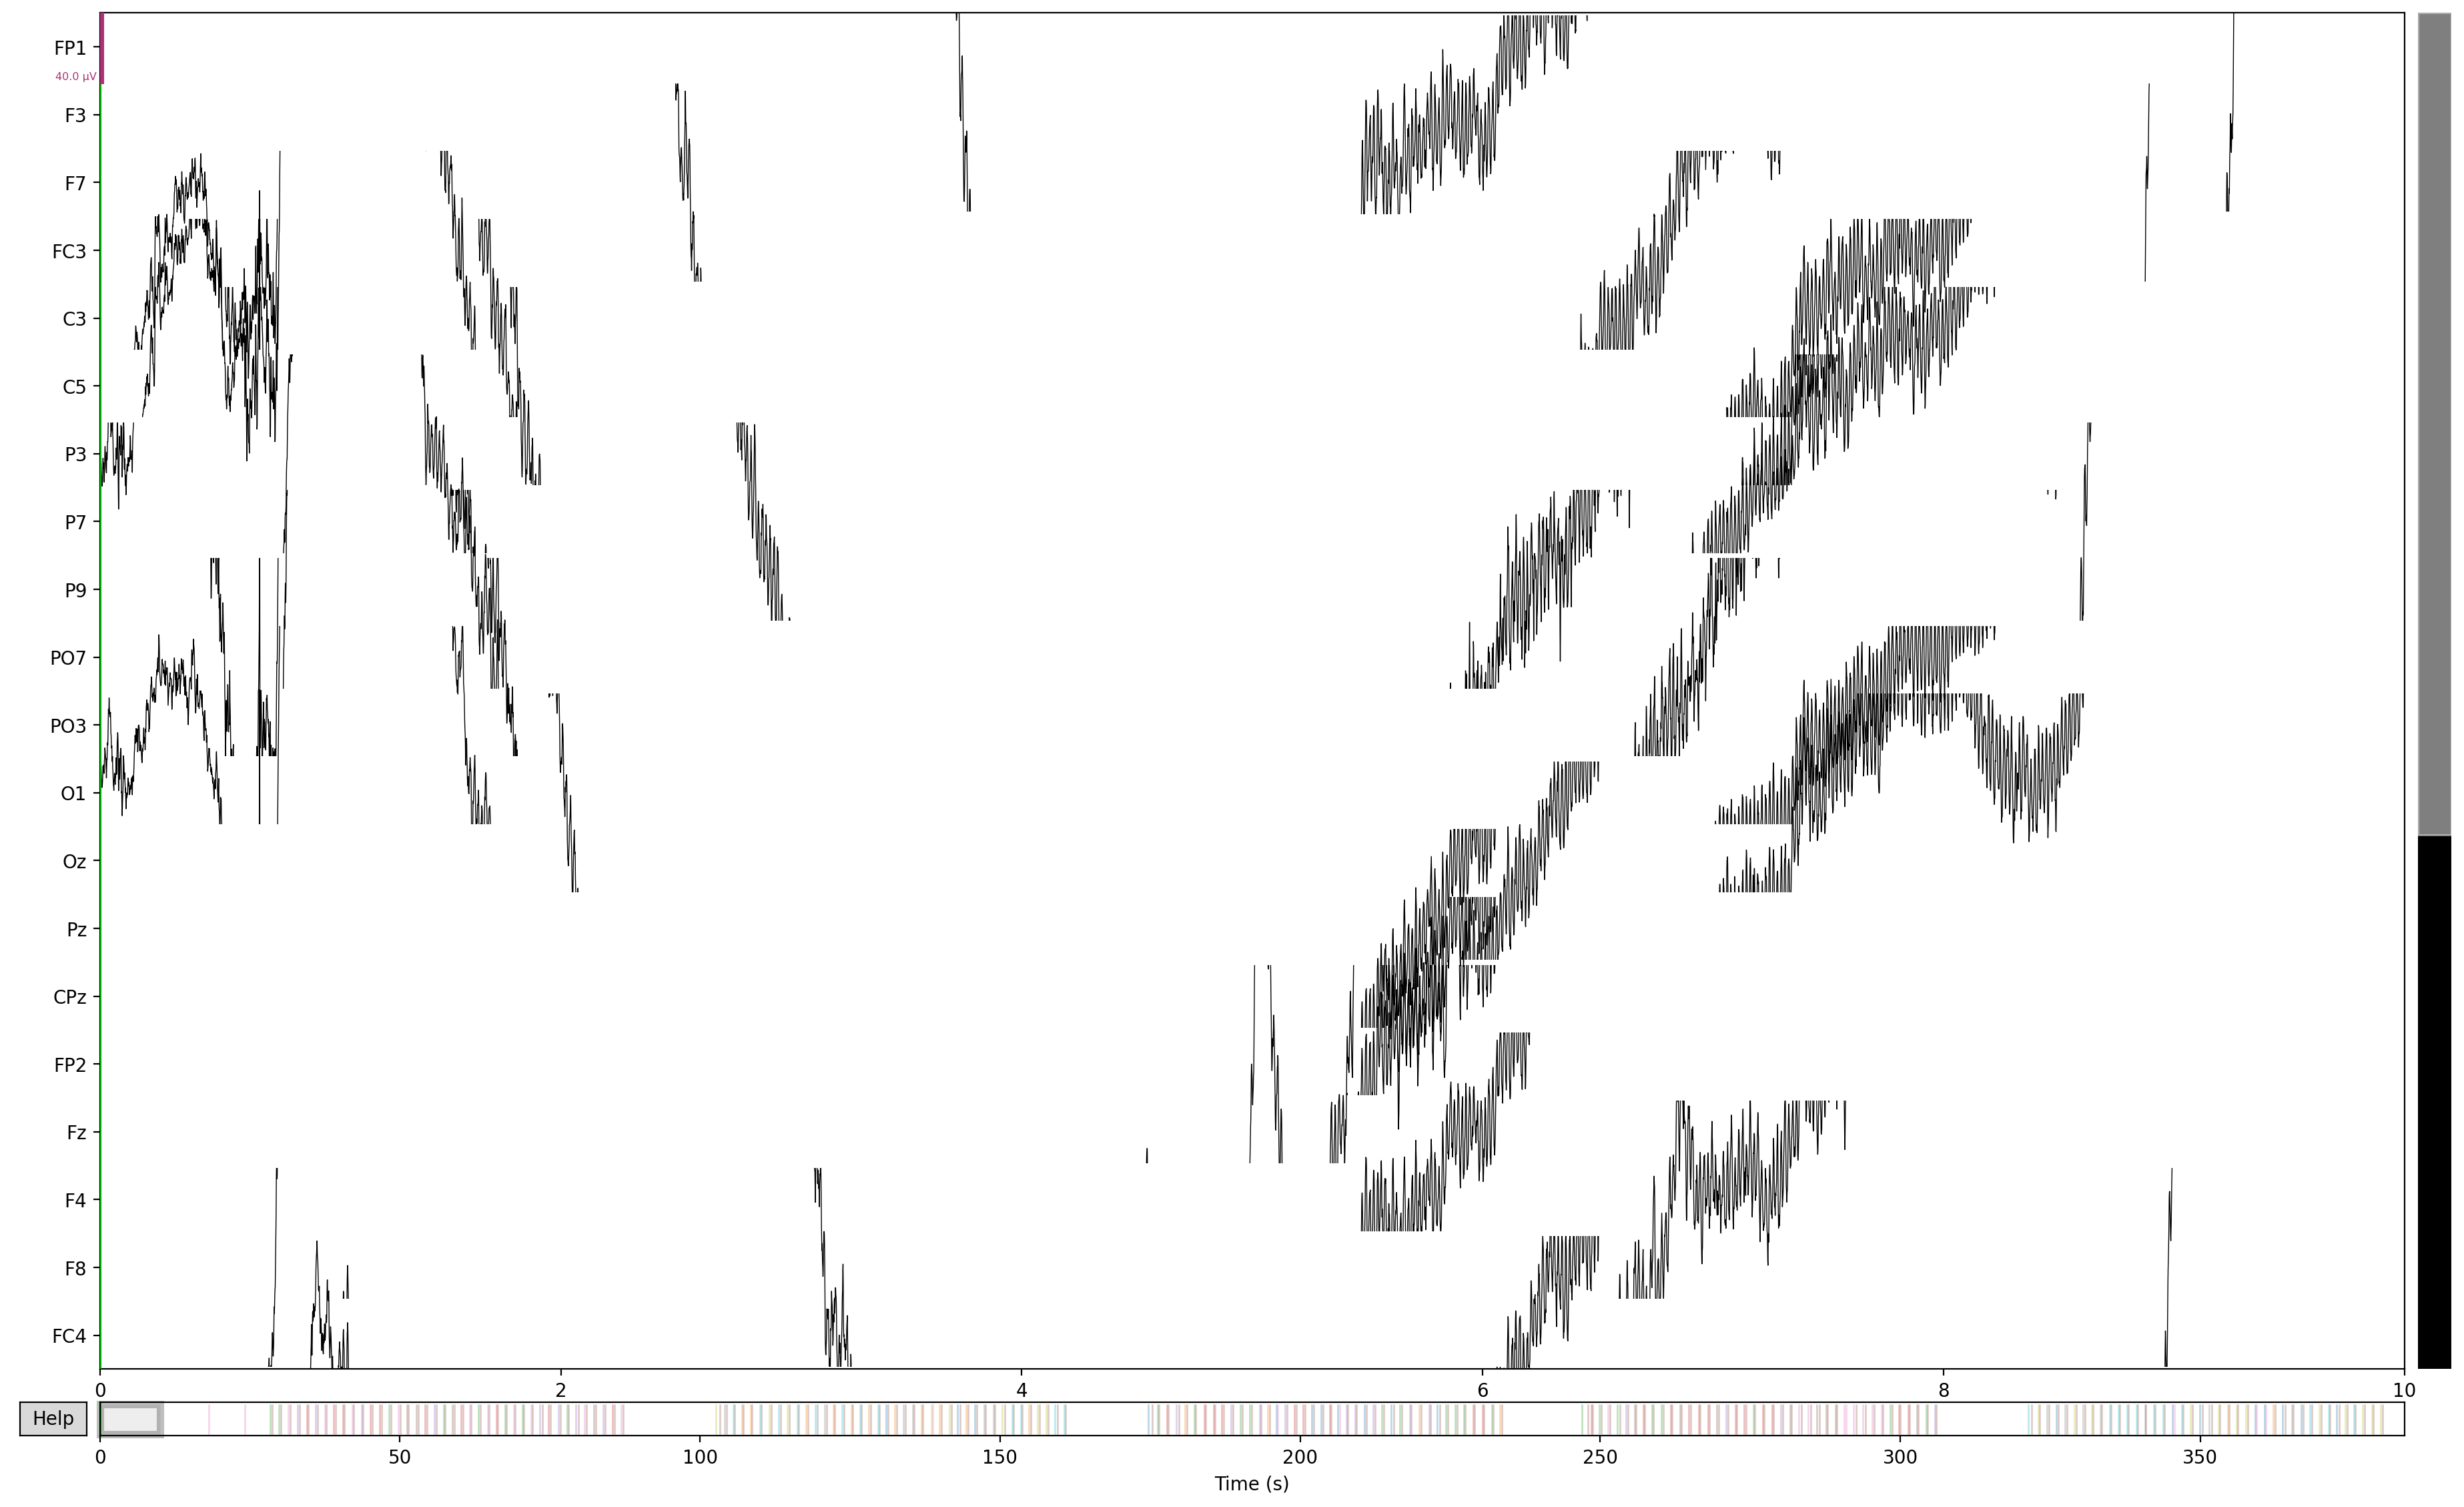

In [2]:
import PyQt5
%matplotlib qt
raw.plot()

Effective window size : 2.000 (s)


<ipython-input-3-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


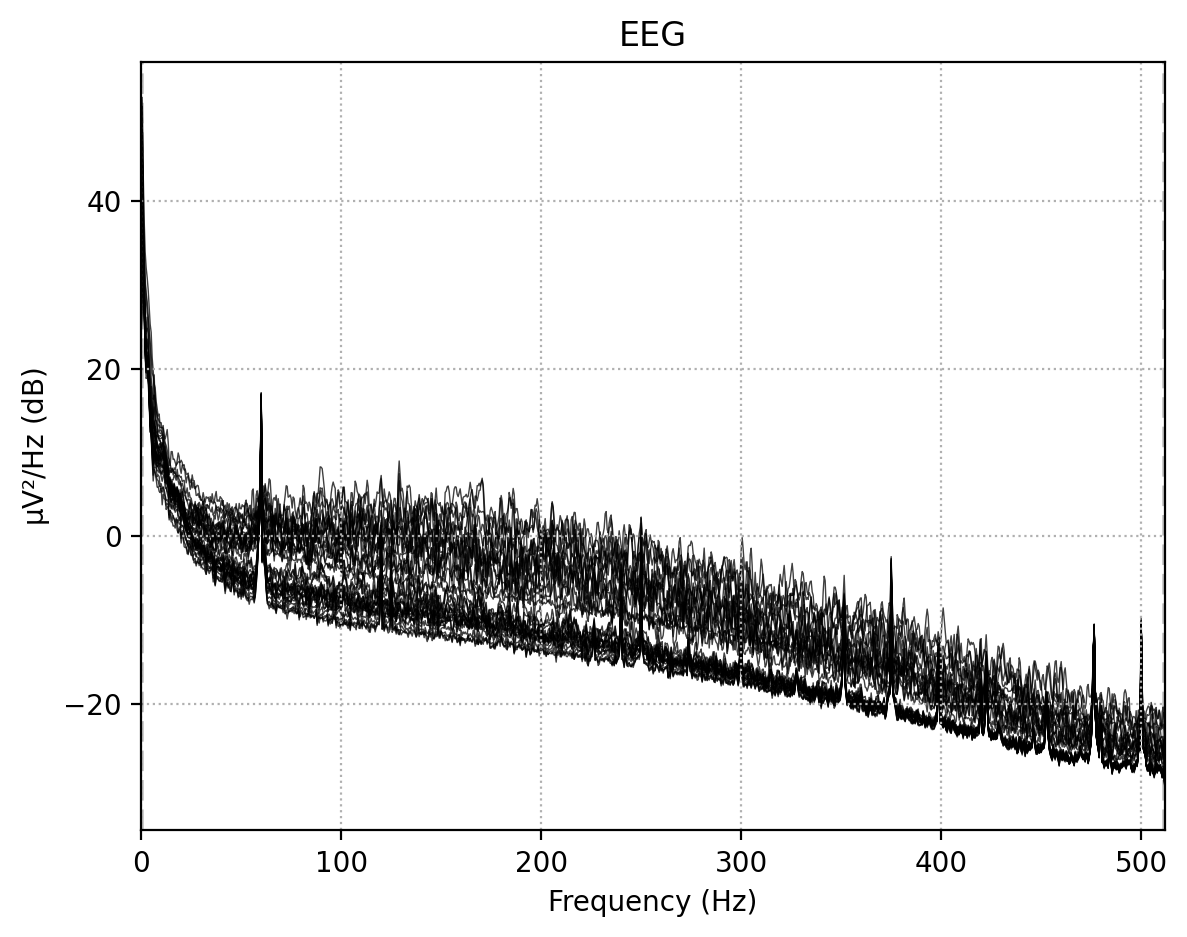

In [3]:
raw.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)

Effective window size : 2.000 (s)


<ipython-input-4-4342bbac8c2c>:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  band_pass.plot_psd()


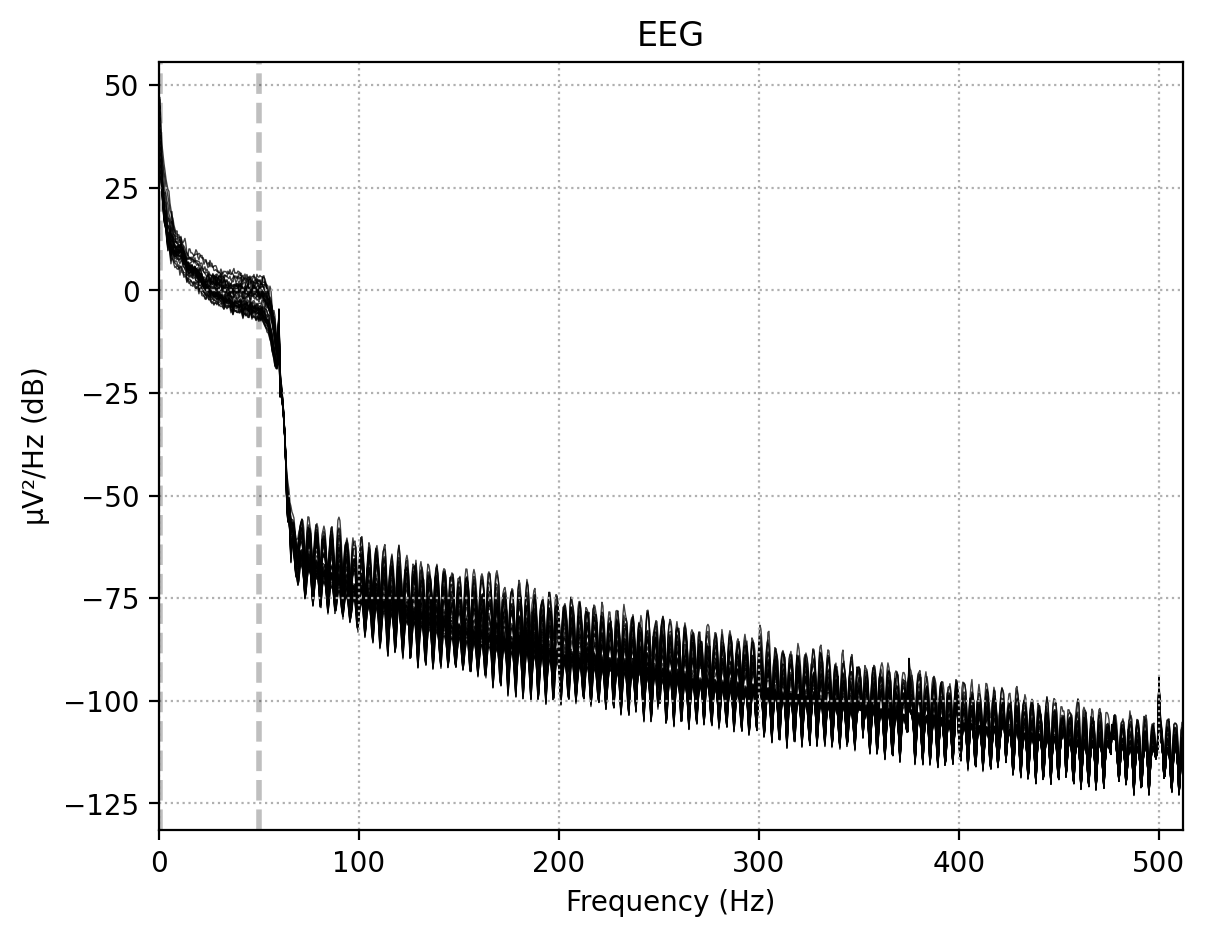

In [4]:
band_pass = raw.copy().filter(l_freq=0.5, h_freq=50)
band_pass.plot_psd()

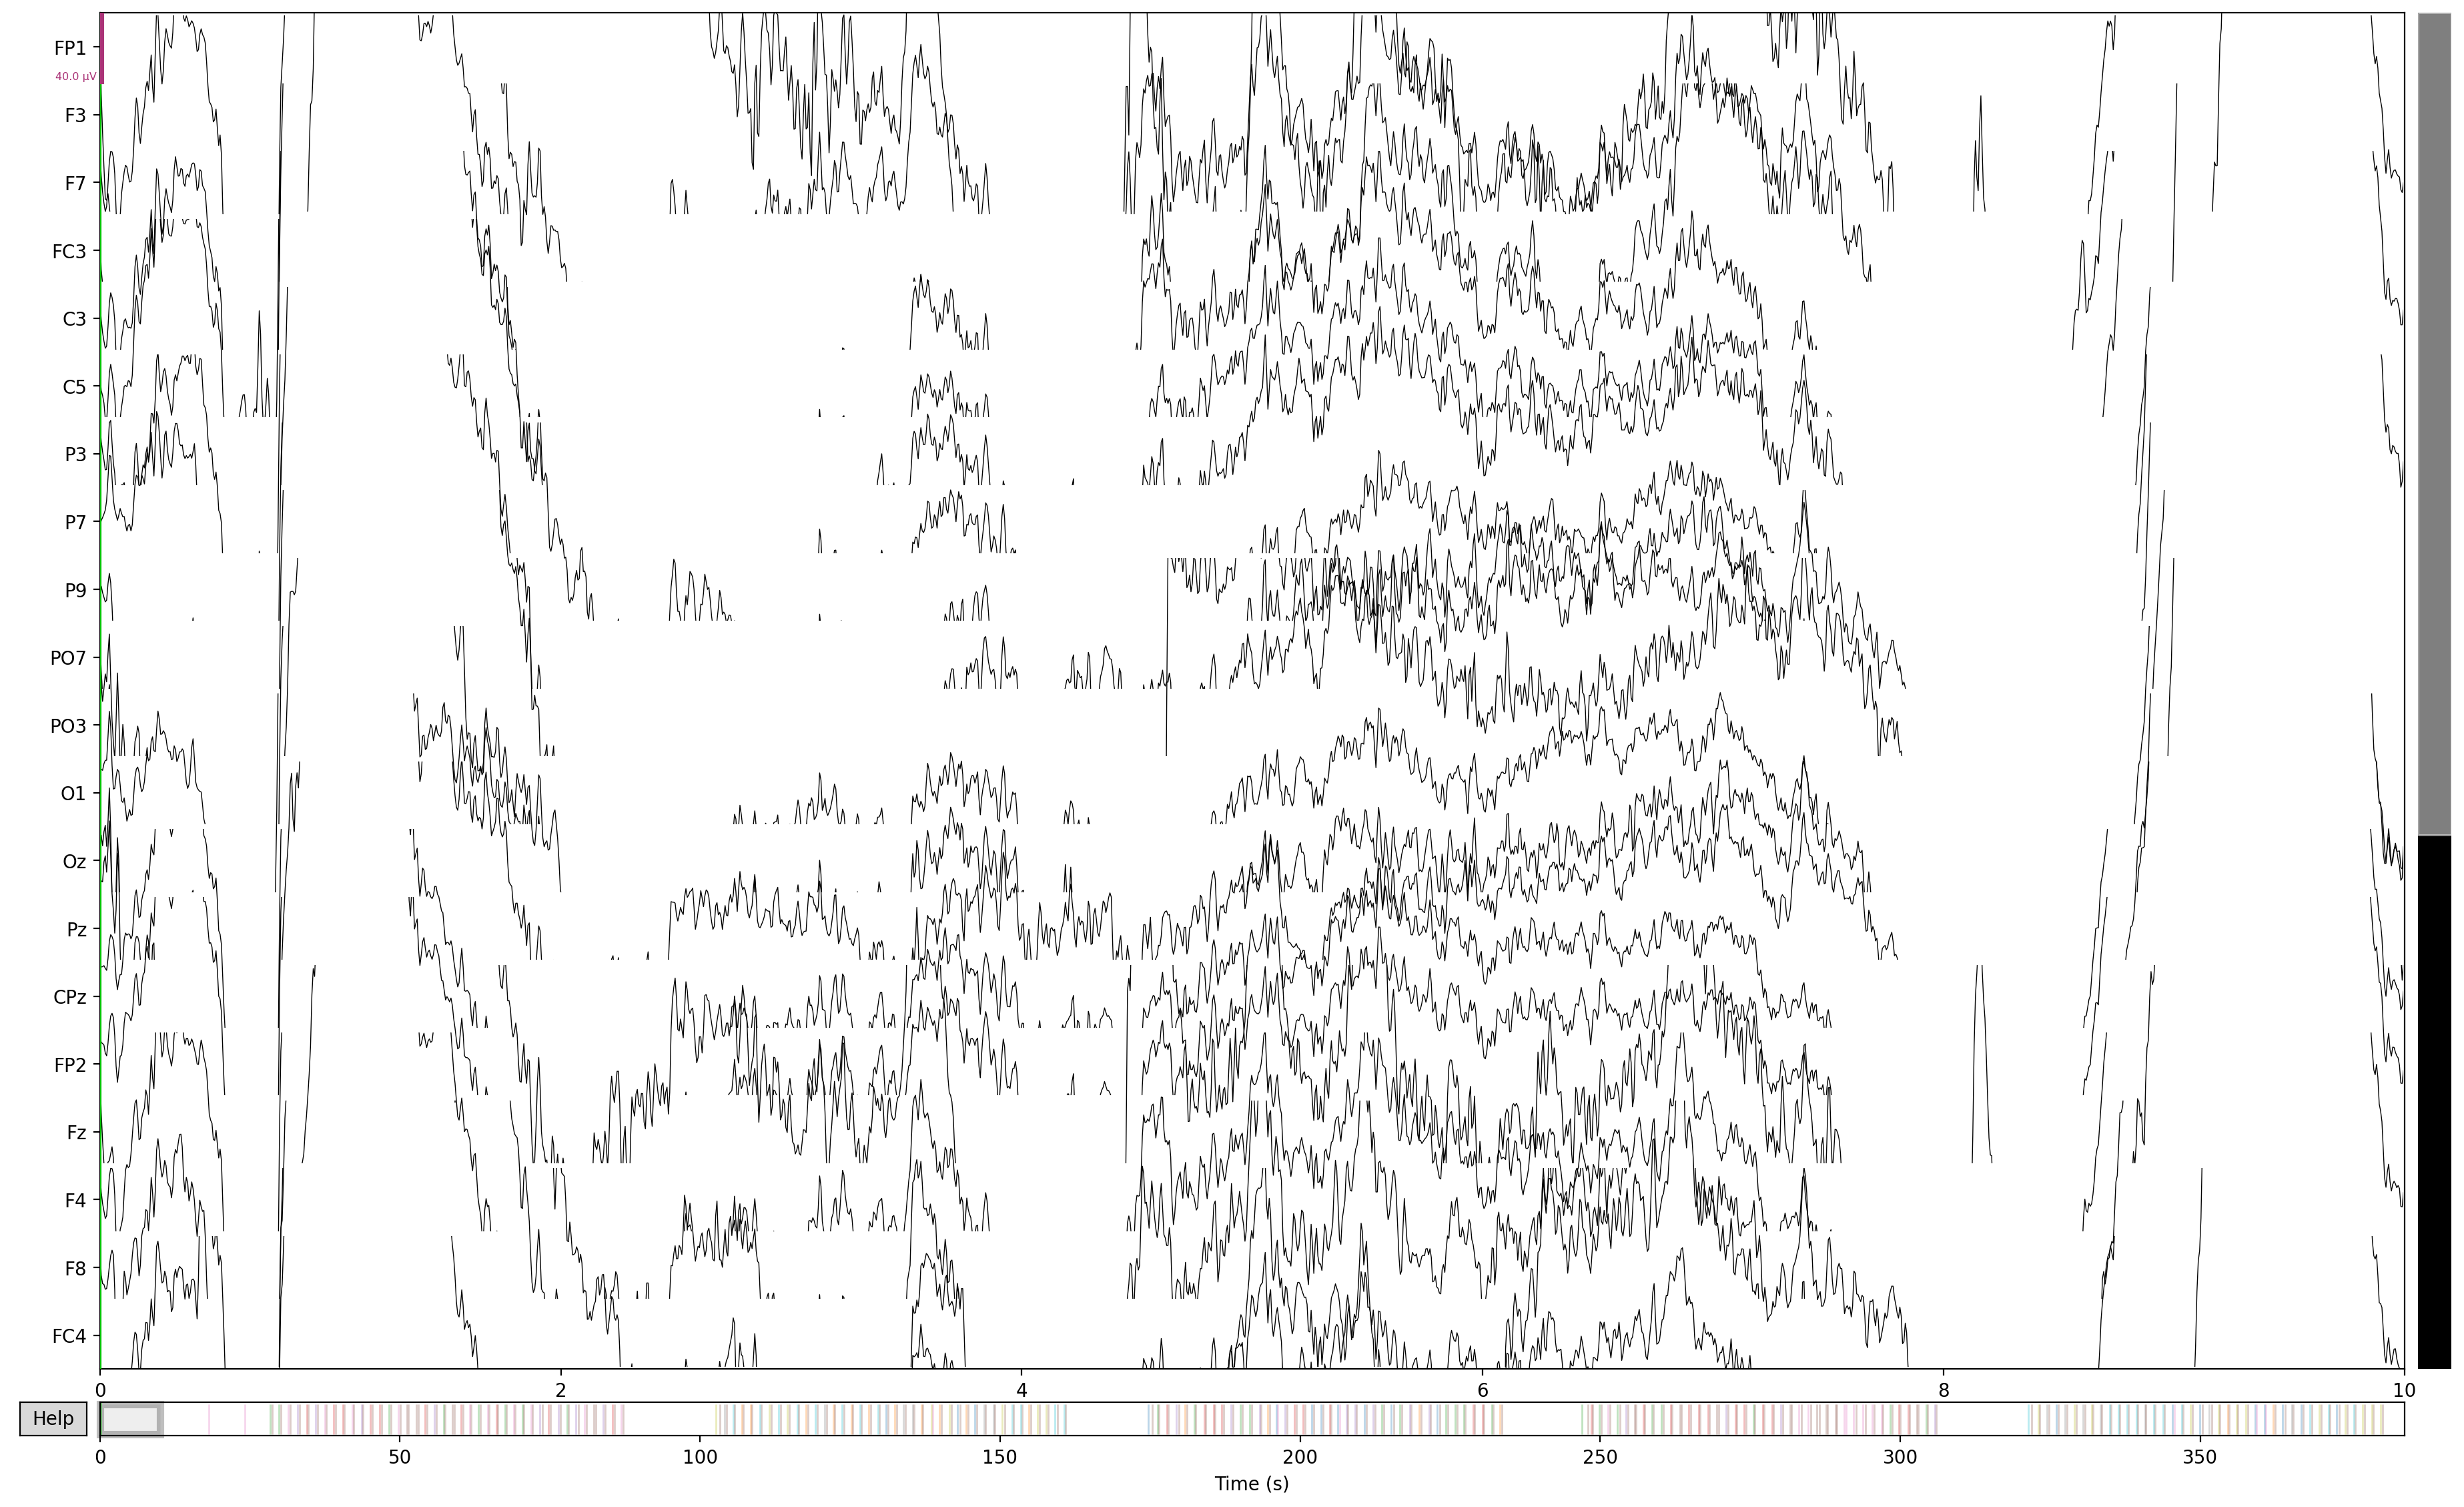

In [5]:
band_pass.plot()

**T:** While going through the dataset, mark what you observe as bad electrodes. Those are saved in `raw.info['bads']`. The channels can be interpolated with `raw.interpolate_bads()` or `epoch.interpolate_bads()`. Compare the channel + neighbours before and after. Did the interpolation succeed? (If you are interested in the mathematical details of spline interpolation, checkout this https://mne.tools/dev/overview/implementation.html#id26)
Hint: You need channel locations to run the interpolation which you can get by using the default-standardized channel locations `raw.set_montage('standard_1020',match_case=False)`

**A:** FP1, FP2, VEOG_lower and HEOG right show the blinks of the eyes, but I didn't remove them

In [6]:
raw.info['bads']

[]

<span style="color:red"> cell above: nothing is shown, even when I mark channels</span>

**T:** Save the annotations to a file. Best practice is to use a csv file of sorts e.g. using `raw.annotations.save(filename)`. Try to subsetting for `BAD_` first. Bonus: Save it in a BIDS derivate folder according to the BIDS guidelines.

In [7]:
import pandas
filename = '../local/30/annotations.csv'
raw.annotations.save(filename)

<span style="color:red"> cell above: 1. my annotations are missing. 2. idk how to subsetting for BAD_</span>


**T:** In MNE, if annotations with `BAD_` exist, the epoching function automatically removes them. We are now ready to compare ERP results with and without removal of bad segments. Epoch the data, the respective bad segments will be removed automatically. Compare the two ERPs for the channel `Cz`

**T:** In the epoching step, we can also specify rejection criterion for a peak-to-peak rejection method

Compare these epochs with your manual rejection and with the ERPs without rejection. Plot a single channel `Cz` overlaying all three "solutions".

In [8]:
import mne as mne
reject_criteria = dict(eeg=100e-6,       # 100 µV
                       eog=200e-6)       # 200 µV
epochs = mne.Epochs(raw, events, reject=reject_criteria,reject_by_annotation=False)

NameError: name 'events' is not defined

**Bonus:** We are going to add to our comparison by using **autoreject** in MNE python. Have a look at https://autoreject.github.io/ for installation and usage examples. Hint: You need channel locations to run autoreject which you can get by using the default-standardized channel locations `raw.set_montage('standard_1020',match_case=False)`

**Bonus:** We can also try to circumvent cleaning by using trimmed / winsorized means. For this, the `epochs.average(method=X)` function can be exchanged with a averaging callback. Scipy has comparable functions that you can try out and compare.